In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
for dirname, _, filenames in os.walk('/Users/yongxingnie/Desktop/data science methods and tools/assigment 2/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/yongxingnie/Desktop/data science methods and tools/assigment 2/data/.DS_Store
/Users/yongxingnie/Desktop/data science methods and tools/assigment 2/data/Breast Cancer Wisconsin Dataset.csv
/Users/yongxingnie/Desktop/data science methods and tools/assigment 2/data/IRIS.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data='/Users/yongxingnie/Desktop/data science methods and tools/assigment 2/data/IRIS.csv'
df=pd.DataFrame(pd.read_csv(data))

In [4]:
df.shape

(150, 5)

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


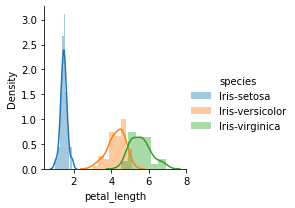

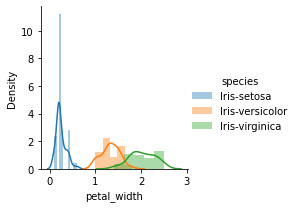

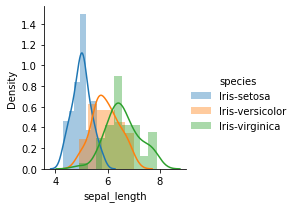

In [6]:
sns.FacetGrid(df,hue="species",size=3).map(sns.distplot,"petal_length").add_legend()
sns.FacetGrid(df,hue="species",size=3).map(sns.distplot,"petal_width").add_legend()
sns.FacetGrid(df,hue="species",size=3).map(sns.distplot,"sepal_length").add_legend()
plt.show()

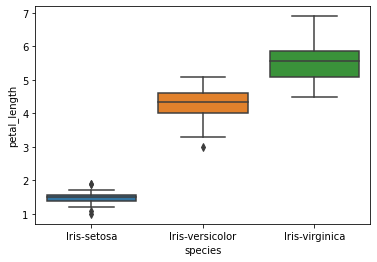

In [7]:
sns.boxplot(x="species",y="petal_length",data=df)
plt.show()

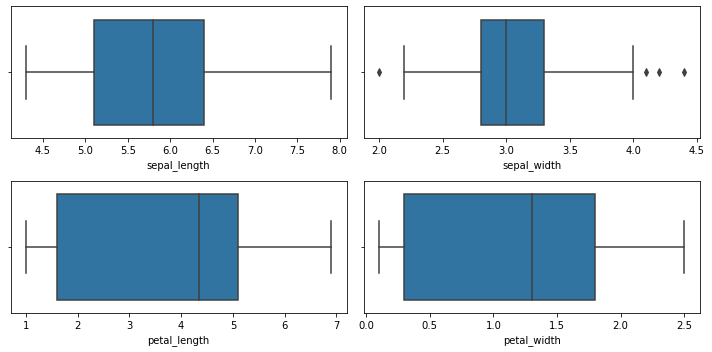

In [8]:
fig, axs = plt.subplots(2,2, figsize = (10,5))
plt1 = sns.boxplot(df['sepal_length'], ax = axs[0,0])
plt2 = sns.boxplot(df['sepal_width'], ax = axs[0,1])
plt1 = sns.boxplot(df['petal_length'], ax = axs[1,0])
plt2 = sns.boxplot(df['petal_width'], ax = axs[1,1])

plt.tight_layout()

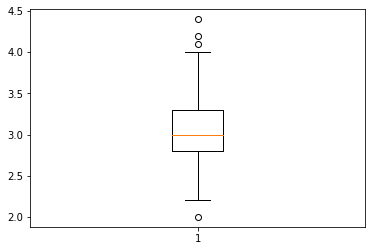

In [9]:
plt.boxplot(df.sepal_width)
Q1 = df.sepal_width.quantile(0.25)
Q3 = df.sepal_width.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.sepal_width >= Q1 - 1.5*IQR) & (df.sepal_width <= Q3 + 1.5*IQR)]

In [10]:
feature_columns = ['sepal_length', 'sepal_width', 'petal_length','petal_width']
X = df[feature_columns].values
X=df.drop(['species'], axis=1)
y = df['species'].values

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [12]:
df=df.drop('species', axis=1)

In [13]:
X=df

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48, shuffle=True)
gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [25]:
grid_search_gbc.best_params_

{'learning_rate': 0.1, 'loss': 'deviance', 'n_estimators': 100}

In [26]:
grid_search_gbc.best_score_

0.9572463768115942

In [28]:
lr_list= [0.05,0.075,0.1,0.25,0.5,0.75,1] #Learning Rate

for learning_rate in lr_list:
    clf= GradientBoostingClassifier(n_estimators=100, 
                                    learning_rate=learning_rate,max_features=2,max_depth=3,random_state=48)
    clf.fit(X_train,y_train)
    print("Learning Rate :", learning_rate)
    print(" Accuracy rate of training ", clf.score(X_train,y_train))
    print("Accuracy score of the test :", clf.score(X_test,y_test))

Learning Rate : 0.05
 Accuracy rate of training  1.0
Accuracy score of the test : 0.9
Learning Rate : 0.075
 Accuracy rate of training  1.0
Accuracy score of the test : 0.9
Learning Rate : 0.1
 Accuracy rate of training  1.0
Accuracy score of the test : 0.9
Learning Rate : 0.25
 Accuracy rate of training  1.0
Accuracy score of the test : 0.9
Learning Rate : 0.5
 Accuracy rate of training  1.0
Accuracy score of the test : 0.9
Learning Rate : 0.75
 Accuracy rate of training  1.0
Accuracy score of the test : 0.9
Learning Rate : 1
 Accuracy rate of training  1.0
Accuracy score of the test : 0.9


In [30]:
clf_new= GradientBoostingClassifier(n_estimators=100,max_features=3,learning_rate=0.1,random_state=1)
clf_new.fit(X_train,y_train)

GradientBoostingClassifier(max_features=3, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.70      1.00      0.82         7
           2       1.00      0.77      0.87        13

    accuracy                           0.90        30
   macro avg       0.90      0.92      0.90        30
weighted avg       0.93      0.90      0.90        30



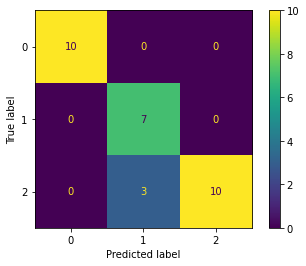

In [36]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = clf_new.predict(X_test)
y_pred_train = clf_new.predict(X_train)

print(metrics.classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred, labels=[0,1,2])
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=[0,1,2])
display.plot()